In [54]:
import numpy as np
from matplotlib import pyplot as plt

my_figsize = [10, 8]
my_fontsize = 30

NUM_BINS = 50000

num_buckets = 600000-1

loads = ['0.1', '0.25', '0.5', '0.75', '1']
loads = ['1']

def freq_array_to_cdf(freq_array):
    # 将频率数组转换为概率数组
    prob_array = freq_array / np.sum(freq_array)

    # 计算累积和
    cdf_array = np.cumsum(prob_array)

    return cdf_array

def find_last_nonzero(arr):
    for i in range(len(arr) - 1, 0, -1):
        if arr[i] > 0.1:
            return i
    return None

def src_packet_delay(filename):
    for i, load in enumerate(loads):
        # fct = np.loadtxt("../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_" + load + "/FCT.txt")
        src_delays = np.zeros(num_buckets)
        for index in range(0, 7):
            # draws/DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_0.1/packet_rough_delays_0.txt
            # filename = "../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_" + load + "/packet_rough_delays_{0}.txt".format(index) 
            # filename = "../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_TEST/packet_rough_delays_{0}.txt".format(index) 
            delay_filename=filename.format(index)
            tmp = np.loadtxt(delay_filename)
            src_delays += tmp[:num_buckets]
            # print(find_last_nonzero(tmp[:num_buckets]))
        # src_delays = np.trim_zeros(src_delays, 'b')
        np.set_printoptions(threshold=np.inf)
        
        last_non_zero = find_last_nonzero(src_delays)
        # print(last_non_zero)
        # print(src_delays[num_buckets-10:num_buckets])
        src_delays = src_delays[:last_non_zero]
        print("max SRC packet delay: ", len(src_delays), "us")
        cdf = freq_array_to_cdf(src_delays)
        
        plt.subplots(figsize=(10, 8))
        # plt.plot(np.arange(0, cdf[0:show_nums])/1e3, cdf[0:show_nums], linestyle='solid', linewidth=5, color = 'firebrick', label="load="+load)
        plt.plot(np.arange(0, len(cdf))/1e3, cdf, linestyle='solid', linewidth=5, color = 'firebrick', label="load="+load)
        plt.xlabel("Delay (ms)", fontsize=my_fontsize)
        plt.ylabel("CDF", fontsize=my_fontsize)
        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)
        plt.xlim(0, 1)
        plt.title("Source Packet Delay", fontsize=my_fontsize)

def core_packet_delay(filename):
    for i, load in enumerate(loads):
        # fct = np.loadtxt("../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_" + load + "/FCT.txt")
        src_delays = np.zeros(num_buckets)
        for index in range(10, 17):
            # draws/DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_0.1/packet_rough_delays_0.txt
            # filename = "../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_W5_" + load + "/packet_rough_delays_{0}.txt".format(index) 
            delay_filename=filename.format(index)
            tmp = np.loadtxt(delay_filename)
            src_delays += tmp[:num_buckets]
            # print(find_last_nonzero(tmp[:num_buckets]))
        # src_delays = np.trim_zeros(src_delays, 'b')
        
        np.set_printoptions(threshold=np.inf)
        
        last_non_zero = find_last_nonzero(src_delays)
        # print(last_non_zero)
        # print(src_delays[num_buckets-10:num_buckets])
        src_delays = src_delays[:last_non_zero]
        print("max CORE packet delay: ", len(src_delays), "us")
        cdf = freq_array_to_cdf(src_delays)
        
        plt.subplots(figsize=(10, 8))
        # plt.plot(np.arange(0, cdf[0:show_nums])/1e3, cdf[0:show_nums], linestyle='solid', linewidth=5, color = 'firebrick', label="load="+load)
        plt.plot(np.arange(0, len(cdf))/1e3, cdf, linestyle='solid', linewidth=5, color = 'firebrick', label="load="+load)
        plt.xlabel("Delay (ms)", fontsize=my_fontsize)
        plt.ylabel("CDF", fontsize=my_fontsize)
        plt.xticks(fontsize=my_fontsize)
        plt.yticks(fontsize=my_fontsize)
        plt.xlim(0, 1)
        plt.title("Core Packet Delay", fontsize=my_fontsize)


max SRC packet delay:  607 us
max CORE packet delay:  697 us


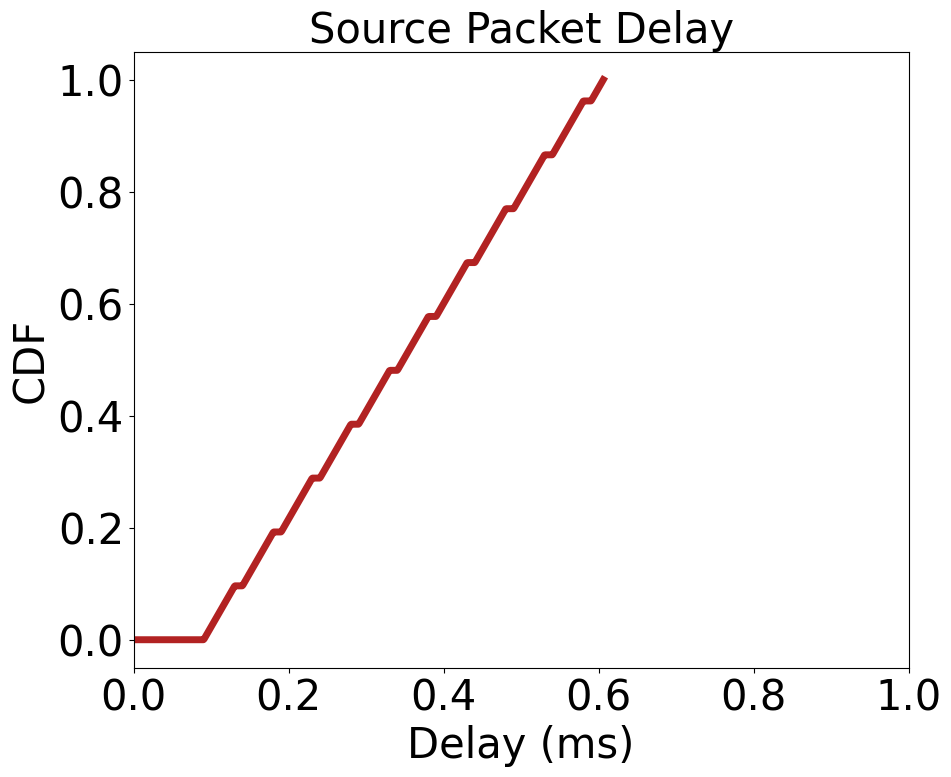

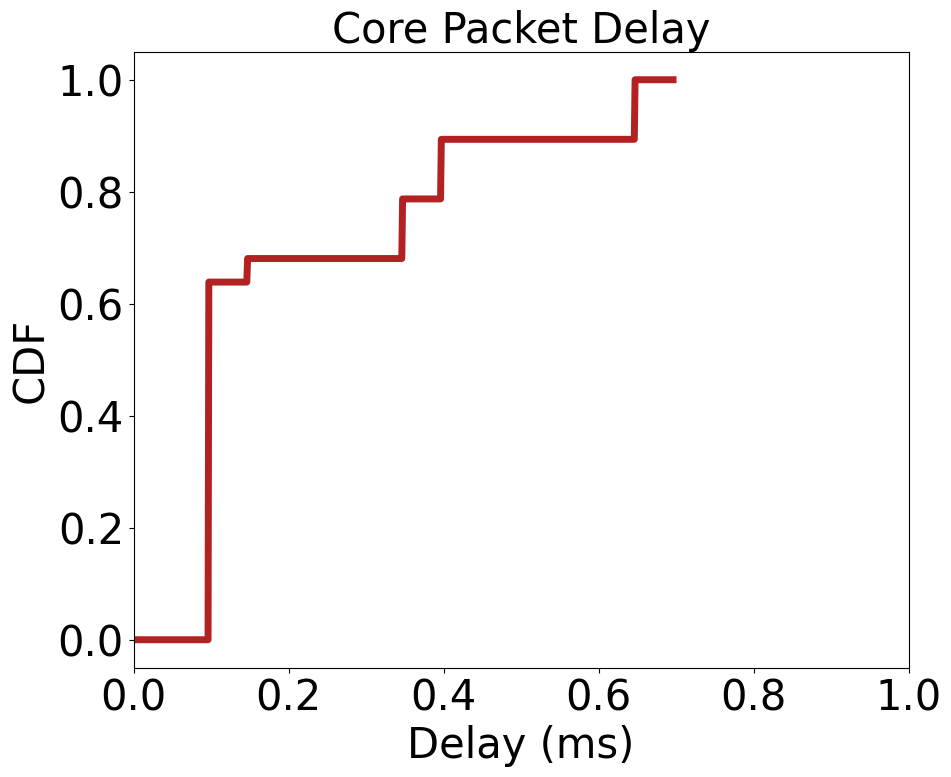

In [55]:
filename = "../DATA/Zeropod/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40_delay_buffer/DATA_zeropod_TEST/packet_rough_delays_{0}.txt"
src_packet_delay(filename)
core_packet_delay(filename)


(0.0, 1.0)

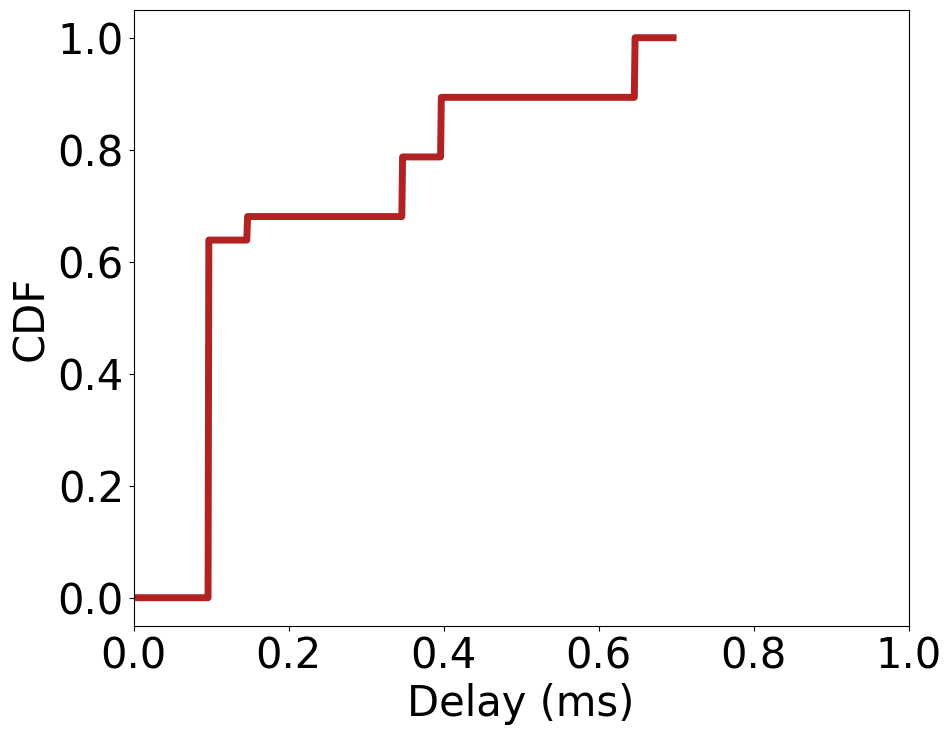

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

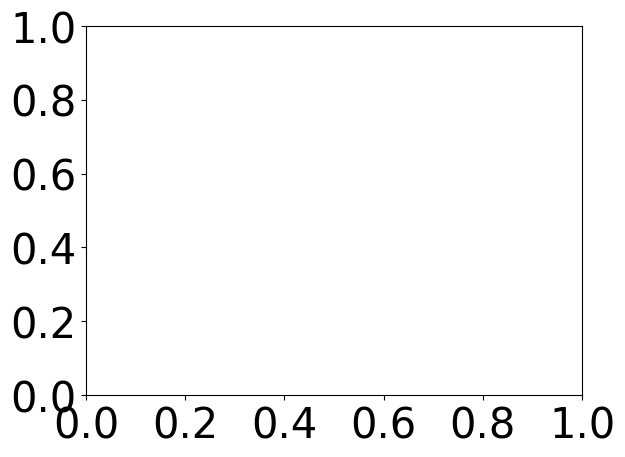

In [39]:
print(src_delays)

[4.00000e+00 3.00000e+00 2.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 6.00000e+00 1.20700e+03 3.45200e+03 4.10900e+03 5.45700e+03
 6.89000e+03 7.63100e+03 7.97100e+03 9.21000e+03 1.04250e+04 1.13570e+04
 1.19070e+04 1.33710e+04 1.38810e+04 1.45780e+04 1.61470e+04 1.67600e+04
 1.72240e+04 1.77940e+04 1.92970e+04 2.06790e+04 2.14230e+04 2.24960e+04
 2.35310e+04 2.41360e+04 2.45510e+04 2.47940e+04 2.51960e+04 2.59370e+04
 2.69150e+04 2.72640e+04 2.80130e+04 2.84230e+04 2.95390e+04 3.04330e+04
 3.12510e+04 3.21640e+04 3.24560e+04 3.32940e+04 3.40650e+04 3.46900e+04
 3.48610e+04 3.49730e+04 3.47670e+04 3.46870e+04 3.44280e+04 3.42570e+04
 3.45950e+04 3.46440e+04 3.45220e+04 3.47950e+04 5.78820e+04 9.04560e+04
 1.16222e+05 1.36926e+05 1.49284e+05 1.62368e+05 1.73228e+05 1.81307e+05
 1.93337e+05 2.07002e+05 2.20781e+05 2.34486e+05 2.46392e+05 2.56946e+05
 2.64226e+05 2.72212e+05 2.86196e+05 2.94129e+05 3.01639e+05 3.12681e+05
 3.20801e+05 3.28941e+05 3.35398e+05 3.45369e+05 3.

[0.00000000e+00 2.05615385e-03 4.11230769e-03 ... 1.02803580e+02
 1.02805636e+02 1.02807692e+02]
[0.00000000e+00 3.03750000e-03 6.07500000e-03 ... 1.51868925e+02
 1.51871962e+02 1.51875000e+02]


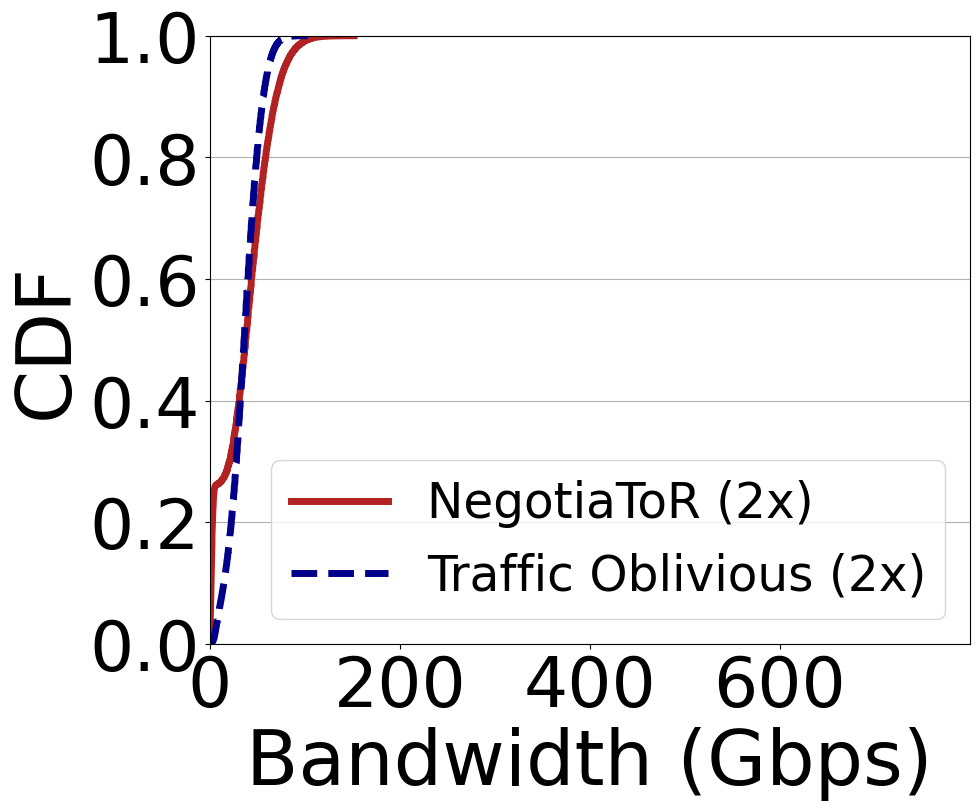

In [8]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.20, right=0.96, bottom=0.21, top=0.97)

my_fontsize = 55
print(bin_edges1)
print(bin_edges2)
plt.plot(bin_edges2[:-1], cdf2/len(Dst_bandwidth_new2), linestyle='solid', linewidth=5, color = 'firebrick', label="NegotiaToR (2x)")
plt.plot(bin_edges1[:-1], cdf1/len(Dst_bandwidth_new), linestyle='--', linewidth=5, color = 'darkblue', label="Traffic Oblivious (2x)")

# Trans_bandwidth_new = np.zeros(int(len(Trans_bandwidth)) - merge)
# for i in range(len(Trans_bandwidth_new)):
#     Trans_bandwidth_new[i] = np.sum(Trans_bandwidth[i : i + merge]) 
# Trans_bandwidth_new = Trans_bandwidth_new *8/show_interval
# counts2, bin_edges2 = np.histogram(Trans_bandwidth_new, bins=NUM_BINS)
# cdf2 = np.cumsum(counts2)
# plt.plot(bin_edges2[:-1], cdf2/len(Trans_bandwidth_new), linewidth=1, color = 'b', label="Intermediate Throughput")


plt.xlabel("Bandwidth (Gbps)", fontsize=my_fontsize)
plt.ylabel("CDF", fontsize=my_fontsize)
plt.xticks([0, 200, 400, 600], (0, 200, 400, 600), fontsize=my_fontsize-5)
plt.yticks(fontsize=my_fontsize-5)
plt.grid(axis='y')

plt.ylim([0,1])
plt.xlim([0,800])


plt.legend(loc="lower right", fontsize=my_fontsize-20)
# plt.subplots_adjust(top=0.6, bottom=0.)
# plt.title(workload)
plt.savefig('../FIGS/NegotiaToR Figs/5/compare_cdf.pdf')

In [42]:
import numpy as np
def find_last_nonzero(arr):
    for i in range(len(arr) - 1, 0, -1):
        if arr[i] != 0:
            return i
    return None

a = np.array([1, 2, 3, 0])
b = np.array([1, 2, 3, 4])
print(a.shape)
print(a)
print(a+b)

(4,)
[1 2 3 0]
[2 4 6 4]
